In [1]:
from qiskit import *

In [9]:
from qiskit import QuantumCircuit, assemble, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#quantum_widgets import *
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram

2 qubit Quantum ckt

In [10]:
qr = QuantumRegister(2)

In [11]:
cr = ClassicalRegister(2)

In [12]:
circuit = QuantumCircuit(qr, cr)

TO draw the ckt

In [6]:
%matplotlib inline

In [13]:
circuit.draw()

q2_0: 
      
q2_1: 
      
c1: 2/

In [16]:
circuit.h(0)

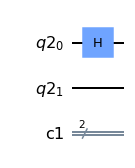

In [18]:
circuit.draw(output='mpl')

In [19]:
circuit.draw()

┌───┐
q2_0: ┤ H ├
      └───┘
q2_1: ─────
           
c1: 2/═════

In [20]:
circuit.cx(0,1) #control x 2 qubit operator

In [21]:
circuit.draw()

┌───┐     
q2_0: ┤ H ├──■──
      └───┘┌─┴─┐
q2_1: ─────┤ X ├
           └───┘
c1: 2/══════════

we have entanglement here

Measuring the output

In [22]:
circuit.measure(qr,cr)

In [23]:
circuit.draw()

┌───┐     ┌─┐   
q2_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q2_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c1: 2/═══════════╩══╩═
                 0  1

# Simlation

In [24]:
simulator = Aer.get_backend("qasm_simulator")

In [25]:
execute(circuit, backend = simulator)

# The result

In [26]:
result = execute(circuit, backend = simulator).result()

In [27]:
from qiskit.tools.visualization import plot_histogram

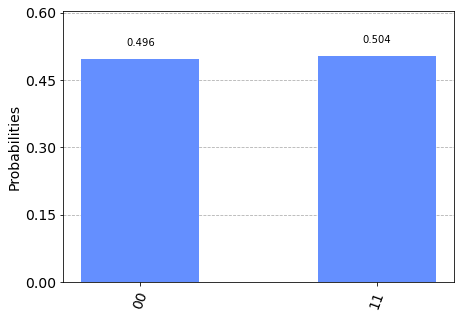

In [28]:
plot_histogram(result.get_counts(circuit))

In [29]:
# load account
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [32]:
provider = IBMQ.get_provider('ibm-q') #below one recommended

In [33]:
# Hot fix, for open machines
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [34]:
qcomp = provider.get_backend('ibmq_bogota')

In [35]:
job = execute(circuit, backend=qcomp)

as the job will be queued, we can monitor the progress like this

In [36]:
from qiskit.tools.monitor import job_monitor

In [37]:
job_monitor(job)

Job Status: job has successfully run


In [38]:
result = job.result()

When plotting, we can see the new outputs 01 and 10, as there are quantum error

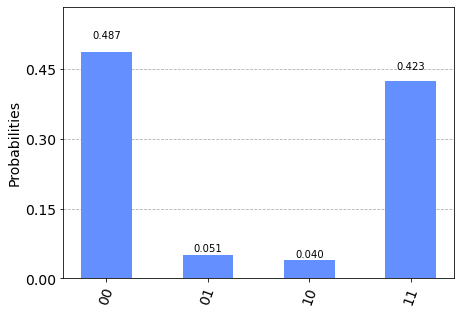

In [39]:
plot_histogram(result.get_counts(circuit))